In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('human.csv', encoding='cp949')
df.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국
0,H20001,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,H20002,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,H20003,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,H20004,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,H20005,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [3]:
mdf = df.copy()

In [4]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   아이디     32561 non-null  object
 1   나이      32561 non-null  int64 
 2   노동 계급   30725 non-null  object
 3   fnlwgt  32561 non-null  int64 
 4   학력      32561 non-null  object
 5   교육 수    32561 non-null  int64 
 6   혼인 상태   32561 non-null  object
 7   직업      30718 non-null  object
 8   관계      32561 non-null  object
 9   인종      32561 non-null  object
 10  성별      32561 non-null  object
 11  자본 이득   32561 non-null  int64 
 12  자본 손실   32561 non-null  int64 
 13  주당 시간   32561 non-null  int64 
 14  모국      31978 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
plt.rcParams['font.family'] = 'Malgun Gothic'

array([[<AxesSubplot:title={'center':'나이'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'교육 수'}>,
        <AxesSubplot:title={'center':'자본 이득'}>],
       [<AxesSubplot:title={'center':'자본 손실'}>,
        <AxesSubplot:title={'center':'주당 시간'}>]], dtype=object)

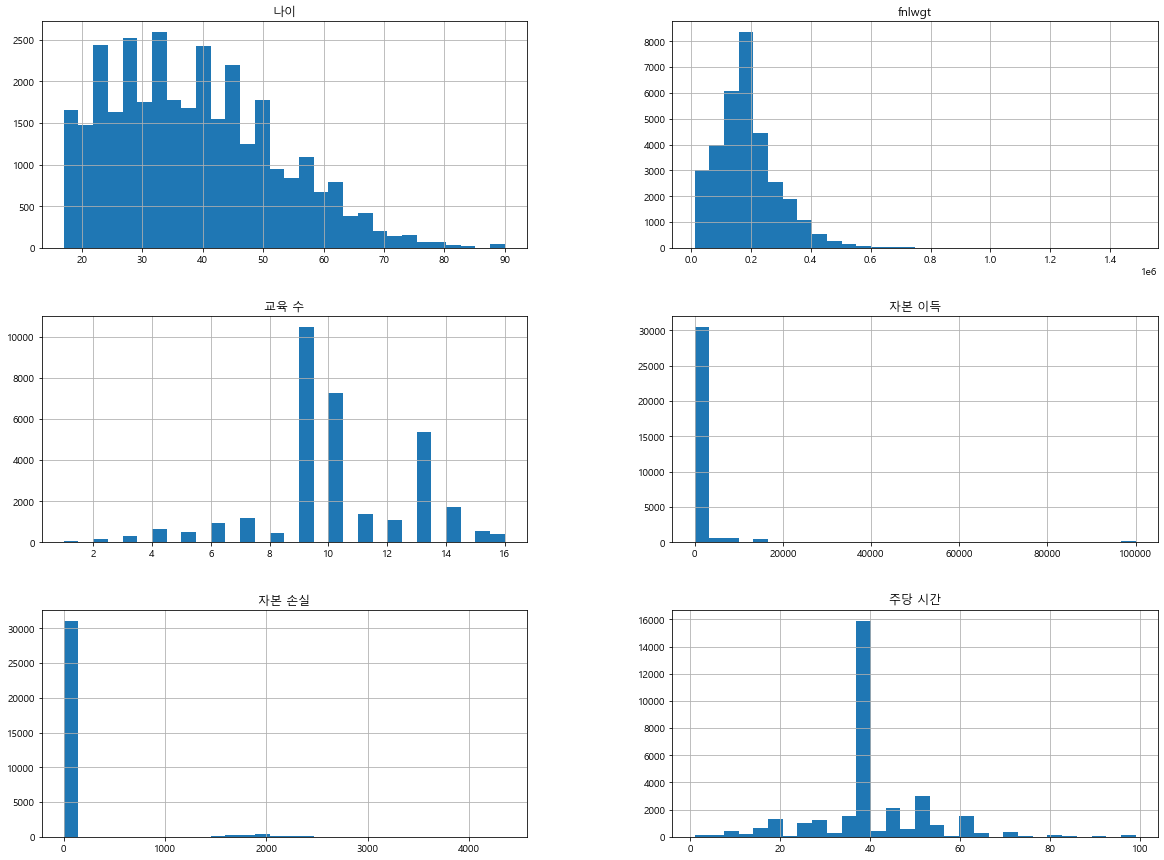

In [6]:
mdf.hist(bins=30, figsize=(20,15))

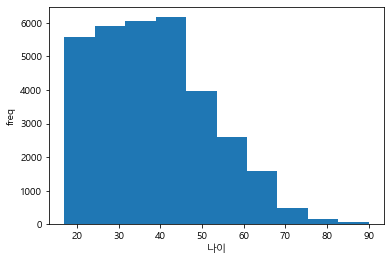

In [7]:
# 나이의 히스토그램을 작성
plt.hist(mdf['나이'])
# x축(횡축)과 y축(종축)의 레이블을 추가
plt.xlabel('나이')
plt.ylabel('freq')
plt.show()

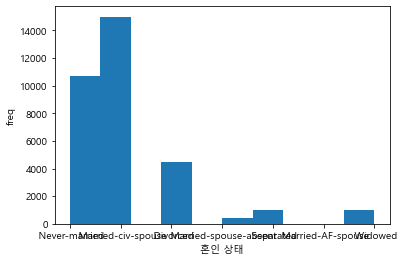

In [8]:
# balance의 히스토그램
plt.hist(mdf['혼인 상태'])
# x축(횡축)과 y축(종축)의 레이블을 추가
plt.xlabel('혼인 상태')
plt.ylabel('freq')
plt.show()

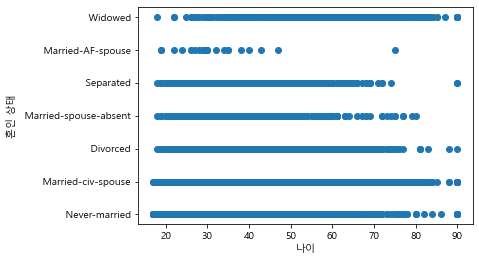

In [9]:
# 나이와 혼인 상태의 산포도를 작성
plt.scatter(mdf['나이'], mdf['혼인 상태'])
# x축(횡축)과 y축（종축）의 레이블을 추가
plt.xlabel('나이')
plt.ylabel('혼인 상태')
plt.show()

In [10]:
# job값의 비율을 계산
print(mdf['노동 계급'].value_counts(ascending=False, normalize=True))

 Private             0.738682
 Self-emp-not-inc    0.082701
 Local-gov           0.068120
 State-gov           0.042246
 Self-emp-inc        0.036322
 Federal-gov         0.031245
 Without-pay         0.000456
 Never-worked        0.000228
Name: 노동 계급, dtype: float64


In [11]:
# job값의 레이블
job_label = mdf['노동 계급'].value_counts(ascending=False, normalize=True).index
# job의 값
job_vals = mdf['노동 계급'].value_counts(ascending=False, normalize=True).values

In [12]:
job_label

Index([' Private', ' Self-emp-not-inc', ' Local-gov', ' State-gov',
       ' Self-emp-inc', ' Federal-gov', ' Without-pay', ' Never-worked'],
      dtype='object')

In [13]:
job_vals

array([7.38681855e-01, 8.27013832e-02, 6.81204231e-02, 4.22457282e-02,
       3.63222132e-02, 3.12449146e-02, 4.55655004e-04, 2.27827502e-04])

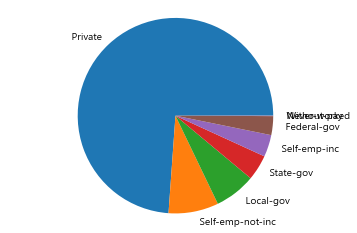

In [14]:
# job의 원그래프를 작성
plt.pie(job_vals, labels=job_label)
plt.axis('equal')
plt.show()

In [15]:
# job값의 레이블
marital_label = mdf['혼인 상태'].value_counts(ascending=False, normalize=True).index
# job의 값
marital_vals = mdf['혼인 상태'].value_counts(ascending=False, normalize=True).values

In [16]:
marital_label

Index([' Married-civ-spouse', ' Never-married', ' Divorced', ' Separated',
       ' Widowed', ' Married-spouse-absent', ' Married-AF-spouse'],
      dtype='object')

In [17]:
marital_vals

array([0.45993673, 0.32809189, 0.13645158, 0.03147938, 0.03049661,
       0.01283744, 0.00070637])

 Married-civ-spouse       0.459937
 Never-married            0.328092
 Divorced                 0.136452
 Separated                0.031479
 Widowed                  0.030497
 Married-spouse-absent    0.012837
 Married-AF-spouse        0.000706
Name: 혼인 상태, dtype: float64


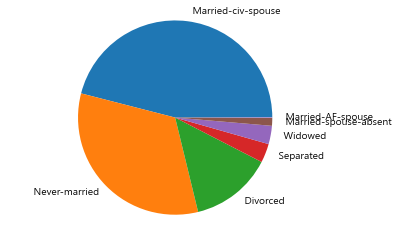

In [18]:
# marital값의 비율을 계산
print(mdf['혼인 상태'].value_counts(ascending=False, normalize=True))

# marital값의 레이블
marital_label = mdf['혼인 상태'].value_counts(ascending=False, normalize=True).index
# martial의 값
marital_vals = mdf['혼인 상태'].value_counts(ascending=False, normalize=True).values

# marital의 원 그래프를 작성
plt.pie(marital_vals, labels=marital_label)
plt.axis('equal')
plt.show()

In [19]:
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic'

<AxesSubplot:>

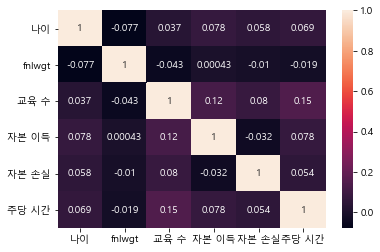

In [20]:
sns.heatmap(mdf.corr(), annot=True)

In [21]:
## 파생변수 추가 (예측 전)

In [22]:
# 주당 시간2 파생변수 추가
mdf['교육 수'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: 교육 수, dtype: int64

In [23]:
mdf['교육 수'].describe()

count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: 교육 수, dtype: float64

In [24]:
mdf.loc[mdf['교육 수'] <= 8]

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국
3,H20004,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
6,H20007,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica
15,H20016,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico
18,H20019,38,Private,28887,11th,7,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States
22,H20023,35,Federal-gov,76845,9th,5,Married-civ-spouse,Farming-fishing,Husband,Black,Male,0,0,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32517,H52518,36,Private,131459,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States
32522,H52523,58,Private,147707,11th,7,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States
32526,H52527,32,Private,211349,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States
32535,H52536,22,Private,325033,12th,8,Never-married,Protective-serv,Own-child,Black,Male,0,0,35,United-States


In [25]:
# 주당 시간2 파생변수 생성 a,b
mdf.loc[mdf['교육 수']<=8,'교육 수2']='a'
mdf.loc[mdf['교육 수']>8,'교육 수2']='b'
mdf

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국,교육 수2
0,H20001,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,b
1,H20002,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,b
2,H20003,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,b
3,H20004,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,a
4,H20005,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,H52557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,b
32557,H52558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,b
32558,H52559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,b
32559,H52560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,b


In [26]:
# 주당 시간2 파생변수 추가
mdf['주당 시간'].head()

0    40
1    13
2    40
3    40
4    40
Name: 주당 시간, dtype: int64

In [27]:
# 주당 시간2 파생변수 생성 h1,h2
mdf['주당 시간'].value_counts()

40    15217
50     2819
45     1824
60     1475
35     1297
      ...  
92        1
94        1
87        1
74        1
82        1
Name: 주당 시간, Length: 94, dtype: int64

In [28]:
mdf['주당 시간'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: 주당 시간, dtype: float64

In [29]:
mdf.loc[mdf['주당 시간'] <= 30]

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국,교육 수2
1,H20002,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,b
6,H20007,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,a
12,H20013,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,b
21,H20022,54,Private,302146,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,20,United-States,b
34,H20035,22,State-gov,311512,Some-college,10,Married-civ-spouse,Other-service,Husband,Black,Male,0,0,15,United-States,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32542,H52543,72,NaN,129912,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,United-States,b
32544,H52545,31,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,b
32545,H52546,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,b
32553,H52554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,b


In [30]:
# 주당 시간2 파생변수 생성 t1,t2
mdf.loc[mdf['주당 시간']<=45,'주당 시간2']='t1'
mdf.loc[mdf['주당 시간']>45,'주당 시간2']='t2'
mdf

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국,교육 수2,주당 시간2
0,H20001,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,b,t1
1,H20002,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,b,t1
2,H20003,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,b,t1
3,H20004,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,a,t1
4,H20005,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,b,t1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,H52557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,b,t1
32557,H52558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,b,t1
32558,H52559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,b,t1
32559,H52560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,b,t1


In [31]:
# one-hot 인코딩
mdf_n2 = pd.get_dummies(mdf['교육 수2'])
mdf_n2.head()

,a,b
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1


In [32]:
## 합치기
mdf = pd.concat([mdf, mdf_n2], axis=1)
mdf

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국,교육 수2,주당 시간2,a,b
0,H20001,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,b,t1,0,1
1,H20002,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,b,t1,0,1
2,H20003,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,b,t1,0,1
3,H20004,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,a,t1,1,0
4,H20005,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,b,t1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,H52557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,b,t1,0,1
32557,H52558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,b,t1,0,1
32558,H52559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,b,t1,0,1
32559,H52560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,b,t1,0,1


In [33]:
# 결측치 처리
# mdf = mdf.dropna(subset=['노동 계급', '직업', '모국'])
# mdf.shape

In [34]:
obj = ['혼인 상태', '노동 계급', '학력', '직업', '관계', '인종', '성별', '모국','교육 수2','주당 시간2']
mdf[obj] = mdf[obj].apply(lambda x: x.astype('category').cat.codes)
mdf.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,성별,자본 이득,자본 손실,주당 시간,모국,교육 수2,주당 시간2,a,b
0,H20001,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,1,0,0,1
1,H20002,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,1,0,0,1
2,H20003,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,1,0,0,1
3,H20004,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0,0,1,0
4,H20005,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,1,0,0,1


In [35]:
mdf.isnull().sum()

아이디       0
나이        0
노동 계급     0
fnlwgt    0
학력        0
교육 수      0
혼인 상태     0
직업        0
관계        0
인종        0
성별        0
자본 이득     0
자본 손실     0
주당 시간     0
모국        0
교육 수2     0
주당 시간2    0
a         0
b         0
dtype: int64

In [36]:
from sklearn.model_selection import train_test_split  

X = mdf.drop(['아이디','성별'], axis=1) 
Y = mdf['성별']                    

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [37]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=8, random_state=0)

In [38]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=0)

In [39]:
display(tree.score(X_test, y_test))

0.8301191499815748

In [40]:
import xgboost as xgb
from xgboost import plot_importance
#import pan
import numpy as np

In [41]:
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [42]:
params = {'max_depth':3,
          'eta':0.1,
          'objective':'binary:logistic',
          'eval_metric':'logloss',
          'early_stoppings':100
         }
num_rounds = 400

In [43]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval'로 명기
wlist = [(dtrain, 'train'),(dtest, 'eval')]
# 하이퍼 파라미터와 early stoppinig 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[12:26:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.64492	eval-logloss:0.64506
[1]	train-logloss:0.60546	eval-logloss:0.60570
[2]	train-logloss:0.57262	eval-logloss:0.57296
[3]	train-logloss:0.54498	eval-logloss:0.54538
[4]	train-logloss:0.52128	eval-logloss:0.52190
[5]	train-logloss:0.50087	eval-logloss:0.50162
[6]	train-logloss:0.48319	eval-logloss:0.48418
[7]	train-logloss:0.46772	eval-logloss:0.46887
[8]	train-logloss:0.45416	eval-logloss:0.45544
[9]	train-logloss:0.44226	eval-logloss:0.44369
[10]	train-logloss:0.43000	eval-logloss:0.43152
[11]	train-logloss:0.42048	eval-logloss:0.42215
[12]	train-logloss:0.41183	eval-logloss:0

[162]	train-logloss:0.28402	eval-logloss:0.29666
[163]	train-logloss:0.28388	eval-logloss:0.29654
[164]	train-logloss:0.28384	eval-logloss:0.29653
[165]	train-logloss:0.28376	eval-logloss:0.29650
[166]	train-logloss:0.28372	eval-logloss:0.29649
[167]	train-logloss:0.28355	eval-logloss:0.29650
[168]	train-logloss:0.28343	eval-logloss:0.29647
[169]	train-logloss:0.28334	eval-logloss:0.29648
[170]	train-logloss:0.28329	eval-logloss:0.29645
[171]	train-logloss:0.28307	eval-logloss:0.29636
[172]	train-logloss:0.28296	eval-logloss:0.29632
[173]	train-logloss:0.28293	eval-logloss:0.29631
[174]	train-logloss:0.28280	eval-logloss:0.29622
[175]	train-logloss:0.28269	eval-logloss:0.29622
[176]	train-logloss:0.28246	eval-logloss:0.29603
[177]	train-logloss:0.28229	eval-logloss:0.29592
[178]	train-logloss:0.28223	eval-logloss:0.29590
[179]	train-logloss:0.28214	eval-logloss:0.29590
[180]	train-logloss:0.28206	eval-logloss:0.29594
[181]	train-logloss:0.28197	eval-logloss:0.29588
[182]	train-logloss:

[330]	train-logloss:0.27037	eval-logloss:0.29443
[331]	train-logloss:0.27031	eval-logloss:0.29442
[332]	train-logloss:0.27022	eval-logloss:0.29444
[333]	train-logloss:0.27017	eval-logloss:0.29445
[334]	train-logloss:0.27008	eval-logloss:0.29439
[335]	train-logloss:0.27003	eval-logloss:0.29439
[336]	train-logloss:0.27001	eval-logloss:0.29439
[337]	train-logloss:0.26992	eval-logloss:0.29438
[338]	train-logloss:0.26989	eval-logloss:0.29439
[339]	train-logloss:0.26982	eval-logloss:0.29437
[340]	train-logloss:0.26970	eval-logloss:0.29434
[341]	train-logloss:0.26967	eval-logloss:0.29433
[342]	train-logloss:0.26961	eval-logloss:0.29432
[343]	train-logloss:0.26960	eval-logloss:0.29431
[344]	train-logloss:0.26958	eval-logloss:0.29430
[345]	train-logloss:0.26952	eval-logloss:0.29433
[346]	train-logloss:0.26946	eval-logloss:0.29435
[347]	train-logloss:0.26941	eval-logloss:0.29435
[348]	train-logloss:0.26940	eval-logloss:0.29438
[349]	train-logloss:0.26939	eval-logloss:0.29438
[350]	train-logloss:

In [44]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10], 3))

preds = [1 if x > 0.5 else 0 for x in pred_probs]

predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨
[0.087 0.478 0.999 1.    0.986 0.548 0.597 0.286 0.1   0.315]


In [45]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy, precision, recall))

In [46]:
get_clf_eval(y_test, preds)

오차행렬
[[2160  541]
 [ 723 4717]]
정확도: 0.8447, 정밀도: 0.8971, 재현율: 0.8671


In [47]:
## 전개

In [48]:
new = pd.read_csv('human_new.csv', encoding='cp949')
new.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국
0,H00001,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,40,United-States
1,H00002,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,50,United-States
2,H00003,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States
3,H00004,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,7688,0,40,United-States
4,H00005,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,0,0,30,United-States


In [49]:
new.isnull().sum()

아이디         0
나이          0
노동 계급     963
fnlwgt      0
학력          0
교육 수        0
혼인 상태       0
직업        966
관계          0
인종          0
자본 이득       0
자본 손실       0
주당 시간       0
모국        274
dtype: int64

In [50]:
X_train.shape

(24420, 17)

In [51]:
new.shape

(16281, 14)

In [52]:
## 파생변수 추가(예측 후 / 전개)

In [53]:
new.loc[new['교육 수']<=8,'교육 수2']='a'
new.loc[new['교육 수']>8,'교육 수2']='b'

In [54]:
new.loc[new['주당 시간']<=45,'주당 시간2']='t1'
new.loc[new['주당 시간']>45,'주당 시간2']='t2'
new

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국,교육 수2,주당 시간2
0,H00001,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,40,United-States,a,t1
1,H00002,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,50,United-States,b,t2
2,H00003,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States,b,t1
3,H00004,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,7688,0,40,United-States,b,t1
4,H00005,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,0,0,30,United-States,b,t1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,H16277,20,NaN,216672,Some-college,10,Never-married,NaN,Own-child,White,0,0,30,United-States,b,t1
16277,H16278,25,Private,61956,Bachelors,13,Never-married,Exec-managerial,Own-child,White,4650,0,45,United-States,b,t1
16278,H16279,33,Private,157216,Masters,14,Never-married,Sales,Not-in-family,White,0,0,40,United-States,b,t1
16279,H16280,68,NaN,150250,Masters,14,Married-civ-spouse,NaN,Husband,White,0,1510,30,United-States,b,t1


In [55]:
# one-hot 인코딩
new_n2 = pd.get_dummies(new['교육 수2'])

# 합치기
new = pd.concat([new, new_n2], axis=1)
new.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국,교육 수2,주당 시간2,a,b
0,H00001,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,40,United-States,a,t1,1,0
1,H00002,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,50,United-States,b,t2,0,1
2,H00003,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States,b,t1,0,1
3,H00004,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,7688,0,40,United-States,b,t1,0,1
4,H00005,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,0,0,30,United-States,b,t1,0,1


In [56]:
from sklearn.impute import SimpleImputer
imputer_con = SimpleImputer(strategy="most_frequent")  
con = ['혼인 상태', '관계', '인종', '모국','교육 수2','주당 시간2']
imputer_con.fit(new[con])

SimpleImputer(strategy='most_frequent')

In [57]:
x = imputer_con.transform(new[con])
x

array([[' Never-married', ' Own-child', ' Black', ' United-States', 'a',
        't1'],
       [' Married-civ-spouse', ' Husband', ' White', ' United-States',
        'b', 't2'],
       [' Married-civ-spouse', ' Husband', ' White', ' United-States',
        'b', 't1'],
       ...,
       [' Never-married', ' Not-in-family', ' White', ' United-States',
        'b', 't1'],
       [' Married-civ-spouse', ' Husband', ' White', ' United-States',
        'b', 't1'],
       [' Married-civ-spouse', ' Husband', ' White', ' United-States',
        'b', 't2']], dtype=object)

In [58]:
new[con] = x
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   아이디     16281 non-null  object
 1   나이      16281 non-null  int64 
 2   노동 계급   15318 non-null  object
 3   fnlwgt  16281 non-null  int64 
 4   학력      16281 non-null  object
 5   교육 수    16281 non-null  int64 
 6   혼인 상태   16281 non-null  object
 7   직업      15315 non-null  object
 8   관계      16281 non-null  object
 9   인종      16281 non-null  object
 10  자본 이득   16281 non-null  int64 
 11  자본 손실   16281 non-null  int64 
 12  주당 시간   16281 non-null  int64 
 13  모국      16281 non-null  object
 14  교육 수2   16281 non-null  object
 15  주당 시간2  16281 non-null  object
 16  a       16281 non-null  uint8 
 17  b       16281 non-null  uint8 
dtypes: int64(6), object(10), uint8(2)
memory usage: 2.0+ MB


In [59]:
new.isnull().sum()

아이디         0
나이          0
노동 계급     963
fnlwgt      0
학력          0
교육 수        0
혼인 상태       0
직업        966
관계          0
인종          0
자본 이득       0
자본 손실       0
주당 시간       0
모국          0
교육 수2       0
주당 시간2      0
a           0
b           0
dtype: int64

In [60]:
new.shape

(16281, 18)

In [61]:
X_train.shape

(24420, 17)

In [62]:
obj1 = ['혼인 상태', '노동 계급', '학력', '직업', '관계', '인종', '모국','교육 수2','주당 시간2']
new[obj1] = new[obj1].apply(lambda x: x.astype('category').cat.codes)
new.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국,교육 수2,주당 시간2,a,b
0,H00001,25,3,226802,1,7,4,6,3,2,0,0,40,37,0,0,1,0
1,H00002,38,3,89814,11,9,2,4,0,4,0,0,50,37,1,1,0,1
2,H00003,28,1,336951,7,12,2,10,0,4,0,0,40,37,1,0,0,1
3,H00004,44,3,160323,15,10,2,6,0,2,7688,0,40,37,1,0,0,1
4,H00005,18,-1,103497,15,10,4,-1,3,4,0,0,30,37,1,0,0,1


In [63]:
new.isnull().sum()

아이디       0
나이        0
노동 계급     0
fnlwgt    0
학력        0
교육 수      0
혼인 상태     0
직업        0
관계        0
인종        0
자본 이득     0
자본 손실     0
주당 시간     0
모국        0
교육 수2     0
주당 시간2    0
a         0
b         0
dtype: int64

In [64]:
ndf = new.copy()
ndf.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국,교육 수2,주당 시간2,a,b
0,H00001,25,3,226802,1,7,4,6,3,2,0,0,40,37,0,0,1,0
1,H00002,38,3,89814,11,9,2,4,0,4,0,0,50,37,1,1,0,1
2,H00003,28,1,336951,7,12,2,10,0,4,0,0,40,37,1,0,0,1
3,H00004,44,3,160323,15,10,2,6,0,2,7688,0,40,37,1,0,0,1
4,H00005,18,-1,103497,15,10,4,-1,3,4,0,0,30,37,1,0,0,1


In [65]:
ndf['성별'] = tree.predict(ndf.loc[:,'나이':'b'])
ndf.head()

,아이디,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국,교육 수2,주당 시간2,a,b,성별
0,H00001,25,3,226802,1,7,4,6,3,2,0,0,40,37,0,0,1,0,1
1,H00002,38,3,89814,11,9,2,4,0,4,0,0,50,37,1,1,0,1,1
2,H00003,28,1,336951,7,12,2,10,0,4,0,0,40,37,1,0,0,1,1
3,H00004,44,3,160323,15,10,2,6,0,2,7688,0,40,37,1,0,0,1,1
4,H00005,18,-1,103497,15,10,4,-1,3,4,0,0,30,37,1,0,0,1,0


In [66]:
dtest_ndf = xgb.DMatrix(data=ndf.loc[:,'나이':'b'])

In [67]:
ndf['성별'] = xgb_model.predict(dtest_ndf)

In [68]:
str = ['아이디','성별']
ndf[str].head()

,아이디,성별
0,H00001,0.736219
1,H00002,0.999954
2,H00003,0.999782
3,H00004,0.999905
4,H00005,0.388036


In [69]:
#ndf[str].to_csv('sampleSubmission_human.csv', encoding='cp949', index=False)

In [70]:
#movie_rename = movie.rename(index={0:'아바타'}, columns={'color':'색깔','director_name':'감독이름'})
ndf_rename = ndf.rename(columns={'아이디':'ID', '성별':'SEX'})
ndf_rename.head()

,ID,나이,노동 계급,fnlwgt,학력,교육 수,혼인 상태,직업,관계,인종,자본 이득,자본 손실,주당 시간,모국,교육 수2,주당 시간2,a,b,SEX
0,H00001,25,3,226802,1,7,4,6,3,2,0,0,40,37,0,0,1,0,0.736219
1,H00002,38,3,89814,11,9,2,4,0,4,0,0,50,37,1,1,0,1,0.999954
2,H00003,28,1,336951,7,12,2,10,0,4,0,0,40,37,1,0,0,1,0.999782
3,H00004,44,3,160323,15,10,2,6,0,2,7688,0,40,37,1,0,0,1,0.999905
4,H00005,18,-1,103497,15,10,4,-1,3,4,0,0,30,37,1,0,0,1,0.388036


In [71]:
str = ['ID','SEX']
ndf_rename[str].head()

,ID,SEX
0,H00001,0.736219
1,H00002,0.999954
2,H00003,0.999782
3,H00004,0.999905
4,H00005,0.388036


In [72]:
ndf_rename[str].to_csv('submission_human12.csv', encoding='cp949', index=False)

In [73]:
ndf_rename.shape

(16281, 19)